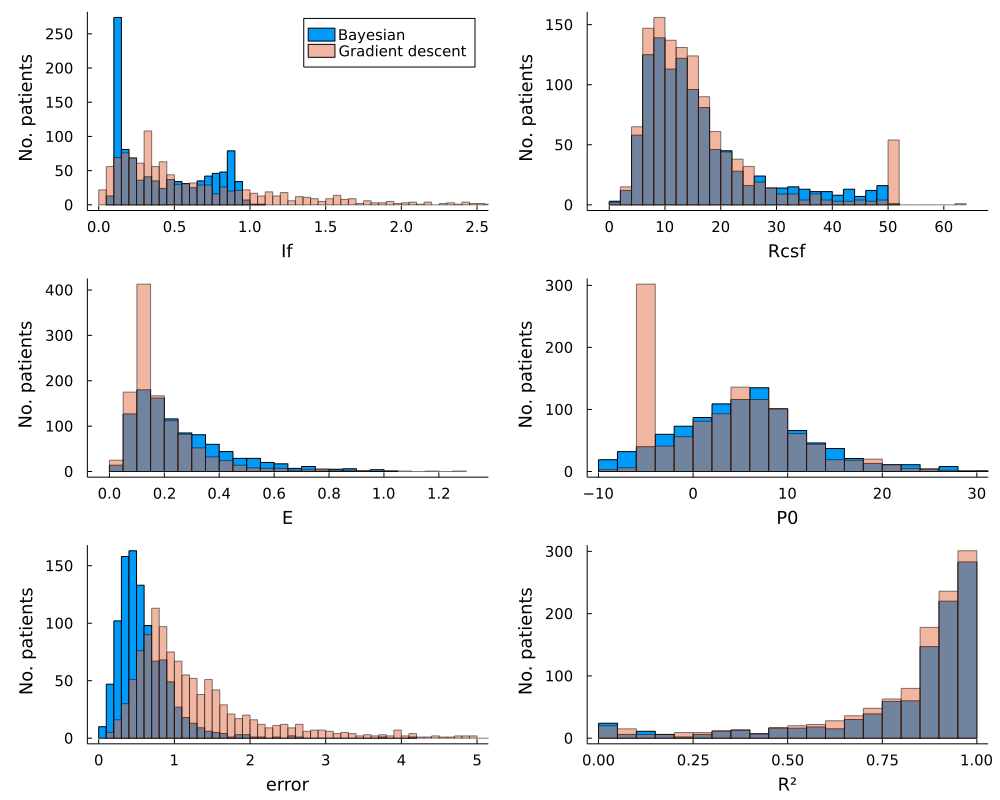

In [10]:
using CSV, Plots, StatsBase

dfBayes = CSV.File("/Users/jjc/CSF/Results/Results_BayesSTD.csv")
dfICM = CSV.File("/Users/jjc/CSF/Results/results_raw_icm.csv")

Rcsf = dfBayes.Rcsf
E = dfBayes.E
Ib = dfBayes.Ib
P0 = dfBayes.P0
error = dfBayes.error
r2 = dfBayes.R2
low_p0 = P0 .< -9.0
high_rcsf = Rcsf .> 40.0
high_ib = Ib .>= 1.0


Rcsf_icm = dfICM.Rcsf
E_icm =    dfICM.E
Ib_icm =   dfICM.Ib
P0_icm =   dfICM.P0
error_icm = dfICM.error
r2_icm = dfICM.R2

torm = low_p0 .|| high_rcsf .|| isnan.(Rcsf) .|| high_ib .|| isnan.(error_icm)
torm = .~torm
torm = Bool.(ones(length(error_icm)))


# histogram(P0[torm], bins=20, label="Bayesian")
# histogram!(P0_icm[torm],bins=40, alpha=0.5, xlabel="Rcsf", ylabel="\n No. patients", label="Gradient descent", grid=false, legendfontsize=14, labelfontsize=15, tickfontsize=15, xlims=[-10.0, 30])

# histogram(P0[torm], bins=20, label="Bayesian")
# histogram!(P0_icm[torm],bins=40, alpha=0.5, xlabel="Pss", ylabel="\n No. patients", label="Gradient descent", grid=false, legendfontsize=14, labelfontsize=15, tickfontsize=15, xlims=[-10.0, 30], dpi=300)

# Bins = collect(0:.5:3)
h1 = histogram([abs.(Ib[torm])], nbins=20, label="Bayesian")
histogram!([Ib_icm[torm]], nbins=200, alpha=0.5, xlabel="If", ylabel="\n No. patients", label="Gradient descent", grid=false, legendfontsize=14, labelfontsize=15, tickfontsize=15, dpi=300, xlims=[0,2.5])

Bins = collect(0:1:50)
h2 = histogram([Rcsf[torm]; Bins], label="Bayesian")
histogram!([Rcsf_icm[torm]; Bins], alpha=0.5, xlabel="Rcsf", ylabel="\n No. patients", label="Gradient descent", grid=false, legendfontsize=14, labelfontsize=15, tickfontsize=15, dpi=300, legend=false)

Bins = collect(0:.1:1)
h3 = histogram([E[torm];Bins], label="Bayesian")
histogram!([E_icm[torm];Bins],alpha=0.5, xlabel="E", ylabel="\n No. patients", label="Gradient descent", grid=false, legendfontsize=14, labelfontsize=15, tickfontsize=15, dpi=300, legend=false)

Bins = collect(-20:.1:40)
h4 = histogram([P0[torm]], label="Bayesian")
histogram!([P0_icm[P0_icm.>-10]], nbins=20,alpha=0.5, xlabel="P0", ylabel="\n No. patients", label="Gradient descent", grid=false, legendfontsize=14, labelfontsize=15, tickfontsize=15, dpi=300, xlims=[-10,30], legend=false)

# Bins = collect(0:0.1:10)
h5 = histogram([error[torm]], label="Bayesian")
histogram!([error_icm[error_icm.<1000]], nbins=500, alpha=0.5, xlabel="error", ylabel="\n No. patients", label="Gradient descent", grid=false, legendfontsize=14, labelfontsize=10, tickfontsize=15, dpi=300, xlims=[0,5], legend=false)

# h6 = plot(legend=false,grid=false,foreground_color_subplot=:transparent, axis=false)
h6 = histogram(r2[torm], label="Bayesian")
histogram!([r2_icm[torm]], alpha=0.5, xlabel="R²", ylabel="\n No. patients", label="Gradient descent", grid=false, legendfontsize=14, labelfontsize=10, tickfontsize=15, dpi=300, xlims=[0,1], legend=false)


l = @layout [a b; c d; e f]
plot(h1,h2,h3,h4,h5,h6,layout=l, size=(1000,800),legendfontsize=10,labelfontsize=12,tickfontsize=10)


# savefig("/Users/jjc/CSF/Results/histogram_all.png")



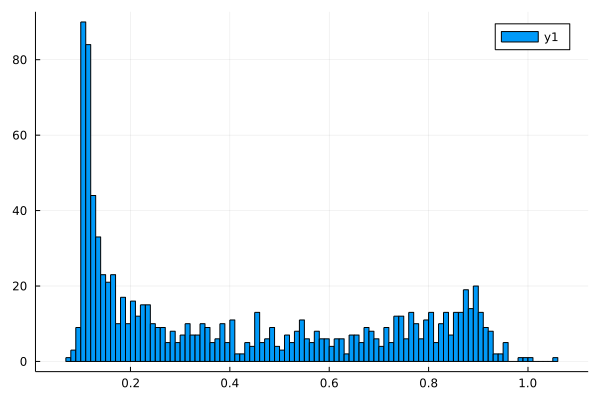

In [17]:
histogram(Ib[.~isnan.(Ib)],bins=100)

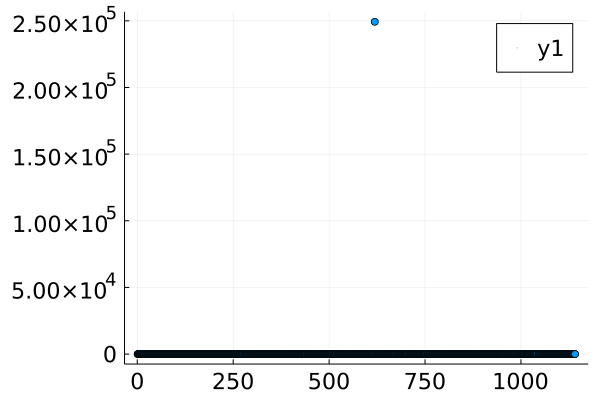

GKS: Character height is invalid in routine SET_TEXT_HEIGHT
GKS: Character height is invalid in routine SET_TEXT_HEIGHT
GKS: Character height is invalid in routine SET_TEXT_HEIGHT
GKS: Character height is invalid in routine SET_TEXT_HEIGHT
GKS: Character height is invalid in routine SET_TEXT_HEIGHT
GKS: Character height is invalid in routine SET_TEXT_HEIGHT
GKS: Character height is invalid in routine SET_TEXT_HEIGHT
GKS: Character height is invalid in routine SET_TEXT_HEIGHT


In [76]:
plot(error_icm,seriestype=:scatter)
error_icm[error_icm < 1000]

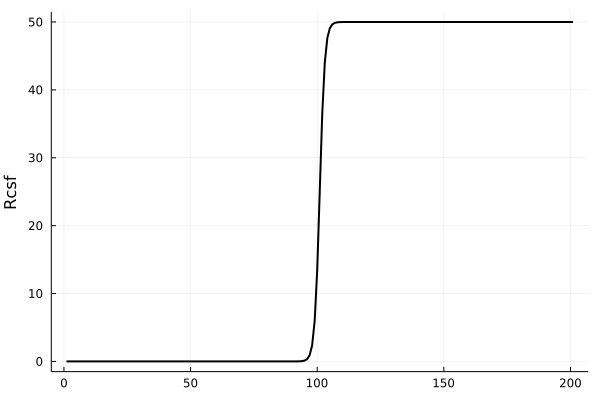

In [91]:
x = collect(-100:100)
lb = 0.0
ub = 50.0
f(x) = 1/(1 + exp(-x))
function sigmoid(x, lb, ub)
    (ub - lb) * (1/(1 + exp(-x))) + lb
end
plot(sigmoid.(x, lb, ub), ylabel="Rcsf", label="", lw=2, color=:black, xticks=(collect(0:50:200)))